In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
import warnings

# 경고 메시지 무시
warnings.filterwarnings("ignore")

# 1. 데이터 생성 (Data Generation)
# y = x^2 - 2x + 3 형태의 이차함수 + 노이즈
np.random.seed(42)
n_samples = 100
X_func = np.linspace(-10, 15, n_samples)
Y_func = X_func**2 - 2 * X_func + 3 + np.random.randn(n_samples) * 1.5


In [13]:
np.shape(X_func)

(100,)

In [14]:
np.shape(Y_func)

(100,)

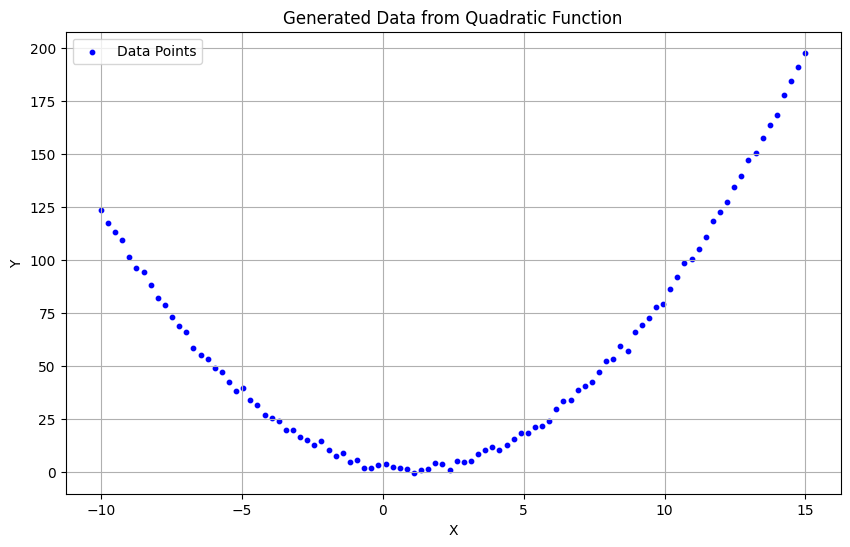

In [15]:
# 주어진 데이터 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_func, Y_func, s=10, label='Data Points', color='blue')
plt.title('Generated Data from Quadratic Function')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

In [16]:
# GMM은 (n_samples, n_features) 형태의 입력을 기대하므로 데이터를 재구성
data = np.vstack([X_func, Y_func]).T

print(f"데이터 형태: {data.shape}")

데이터 형태: (100, 2)


In [39]:
type(data)

numpy.ndarray

In [40]:
data[:5]

array([[-10.        , 123.74507123],
       [ -9.74747475, 117.300817  ],
       [ -9.49494949, 113.11549771],
       [ -9.24242424, 109.19179915],
       [ -8.98989899, 101.44685177]])

In [17]:
# 2. GMM 모델 학습 및 평가 (Modeling & Evaluation)
# n_components를 1부터 10까지 변화시키며 AIC/BIC 비교
n_components_range = range(1, 11)
bic_scores = []
aic_scores = []
gmm_models = []

for n_components in n_components_range:
    # GMM 모델 생성 및 학습
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(data)
    
    # 모델 및 점수 저장
    gmm_models.append(gmm)
    bic_scores.append(gmm.bic(data))
    aic_scores.append(gmm.aic(data))

In [18]:
gmm

,n_components,10
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


In [19]:
gmm_models

[GaussianMixture(random_state=42),
 GaussianMixture(n_components=2, random_state=42),
 GaussianMixture(n_components=3, random_state=42),
 GaussianMixture(n_components=4, random_state=42),
 GaussianMixture(n_components=5, random_state=42),
 GaussianMixture(n_components=6, random_state=42),
 GaussianMixture(n_components=7, random_state=42),
 GaussianMixture(n_components=8, random_state=42),
 GaussianMixture(n_components=9, random_state=42),
 GaussianMixture(n_components=10, random_state=42)]

In [20]:
bic_scores

[np.float64(1760.5427184843559),
 np.float64(1692.562163599507),
 np.float64(1494.499414545373),
 np.float64(1406.9541176103528),
 np.float64(1240.7571818915844),
 np.float64(1268.363654125069),
 np.float64(1400.2008228904906),
 np.float64(1268.070951481528),
 np.float64(1280.5106148057444),
 np.float64(1295.7763017948157)]

In [21]:
aic_scores

[np.float64(1747.5168675544155),
 np.float64(1663.9052915536379),
 np.float64(1450.2115213835755),
 np.float64(1347.0352033326267),
 np.float64(1165.2072464979299),
 np.float64(1177.1826976154857),
 np.float64(1293.3888452649787),
 np.float64(1145.6279527400877),
 np.float64(1142.4365949483756),
 np.float64(1142.0712608215183)]

In [22]:
# 가장 낮은 BIC를 가진 모델을 최적 모델로 선택
best_gmm_index = np.argmin(bic_scores)
best_gmm = gmm_models[best_gmm_index]
best_n_components = best_gmm.n_components

print(f"최적의 컴포넌트 개수 (BIC 기준): {best_n_components}")

최적의 컴포넌트 개수 (BIC 기준): 5


In [26]:
best_gmm_index # 5번쨰 컴포넌트가 최적

np.int64(4)

In [27]:
best_gmm

,n_components,5
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


matplotlib version: 3.10.5


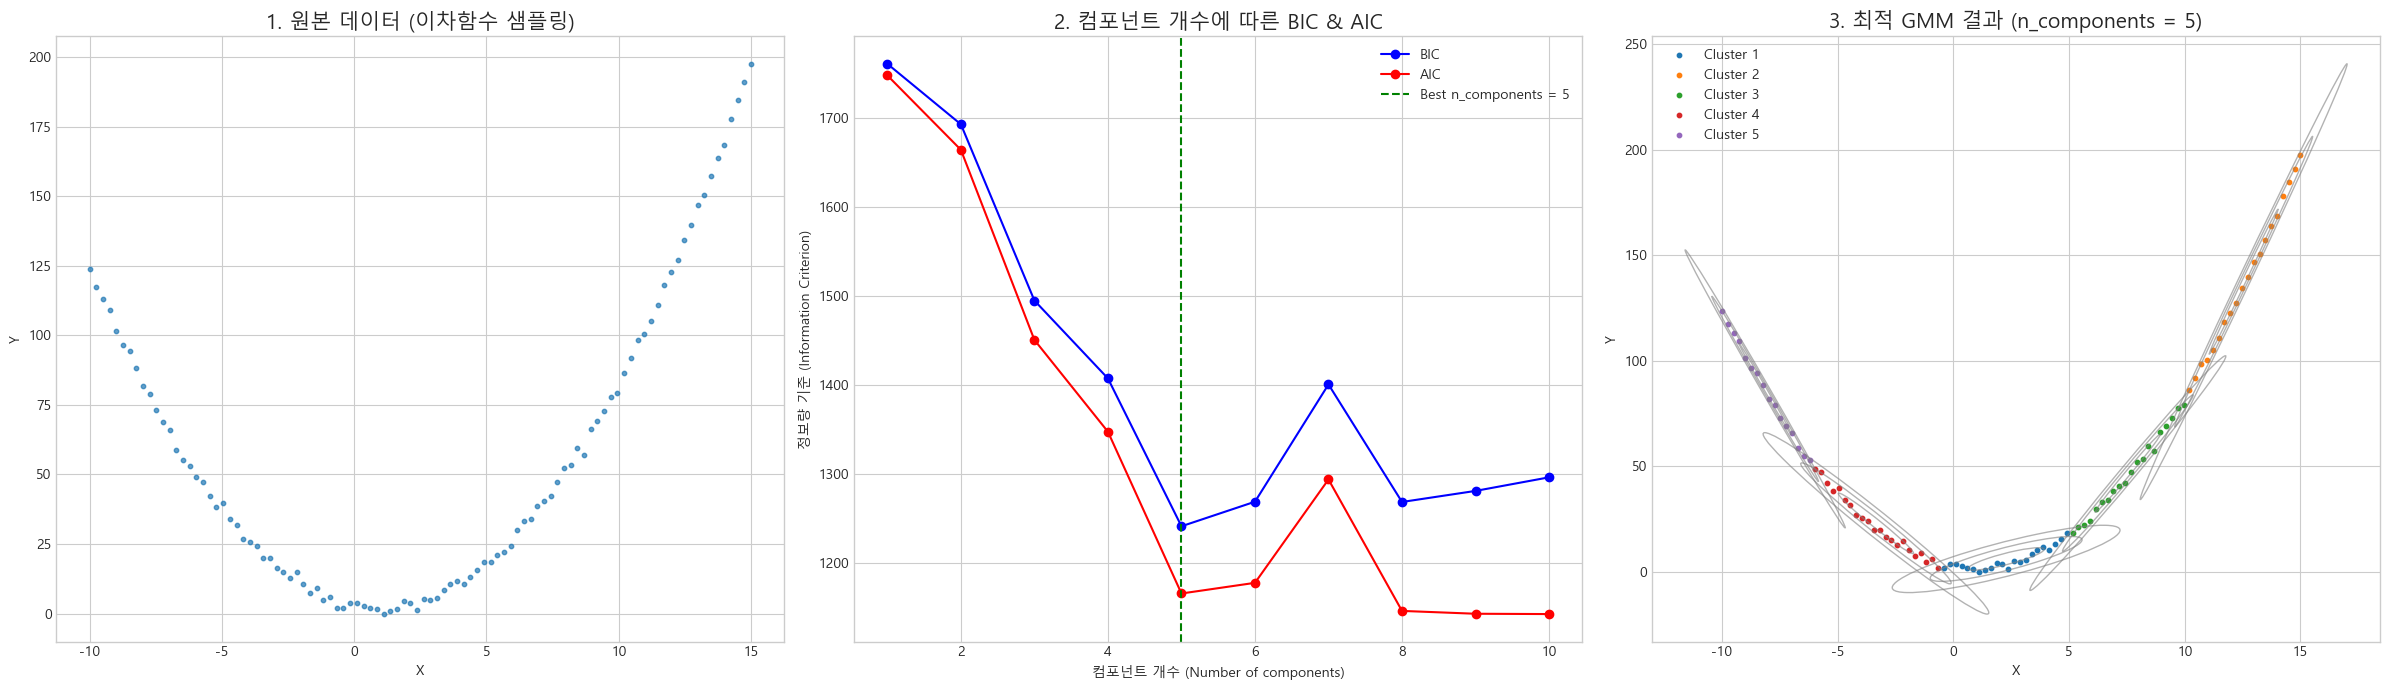

In [31]:
# 3. 결과 시각화 (Visualization)

# plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(24, 7))
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 3-1. 원본 데이터 시각화
axes[0].scatter(data[:, 0], data[:, 1], s=10, alpha=0.7)
axes[0].set_title('1. 원본 데이터 (이차함수 샘플링)', fontsize=15)
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

# 3-2. AIC/BIC 점수 시각화
axes[1].plot(n_components_range, bic_scores, 'bo-', label='BIC')
axes[1].plot(n_components_range, aic_scores, 'ro-', label='AIC')
axes[1].axvline(best_n_components, color='green', linestyle='--', 
                label=f'Best n_components = {best_n_components}')
axes[1].set_title('2. 컴포넌트 개수에 따른 BIC & AIC', fontsize=15)
axes[1].set_xlabel('컴포넌트 개수 (Number of components)')
axes[1].set_ylabel('정보량 기준 (Information Criterion)')
axes[1].legend()

# 3-3. 최적 GMM 결과 시각화
splot = axes[2]
Y_ = best_gmm.predict(data)

# 각 클러스터에 대해 다른 색상으로 데이터 표시
for i in range(best_n_components):
    splot.scatter(data[Y_ == i, 0], data[Y_ == i, 1], s=10,
                   label=f'Cluster {i+1}')

# GMM이 학습한 가우시안 분포를 타원으로 그리는 함수
# 오류 원인: 현재 설치된 matplotlib 버전에서 Ellipse 생성자 시그니처가 (xy, width, height, **kwargs) 형태라
# angle 위치 인자를 추가로 주면 "takes 4 positional arguments but 5 were given" TypeError 발생.
# 해결: angle을 키워드 인자로 angle=angle 형태로 전달.
from matplotlib import __version__ as mpl_version
print("matplotlib version:", mpl_version)

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    
    # 공분산 행렬에서 고유값 분해로 타원의 주축 찾기
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)  # 1-σ (표준편차) 기준 지름
    else:  # 1D 공분산 (대각) 가정
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # 1,2,3 σ 수준 타원
    for nsig in range(1, 4):
        ax.add_patch(
            Ellipse(
                position,
                nsig * width,
                nsig * height,
                angle=angle,   # 여기서 angle을 키워드로 전달
                fill=False,
                **kwargs
            )
        )

# 각 가우시안 분포의 평균과 공분산을 가져와 타원 그리기
for i in range(best_n_components):
    draw_ellipse(
        best_gmm.means_[i],
        best_gmm.covariances_[i],
        ax=splot,
        alpha=0.6,
        color='gray',
        linewidth=1
    )

splot.set_title(f'3. 최적 GMM 결과 (n_components = {best_n_components})', fontsize=15)
splot.set_xlabel('X')
splot.set_ylabel('Y')
splot.legend()

plt.tight_layout()
plt.show()

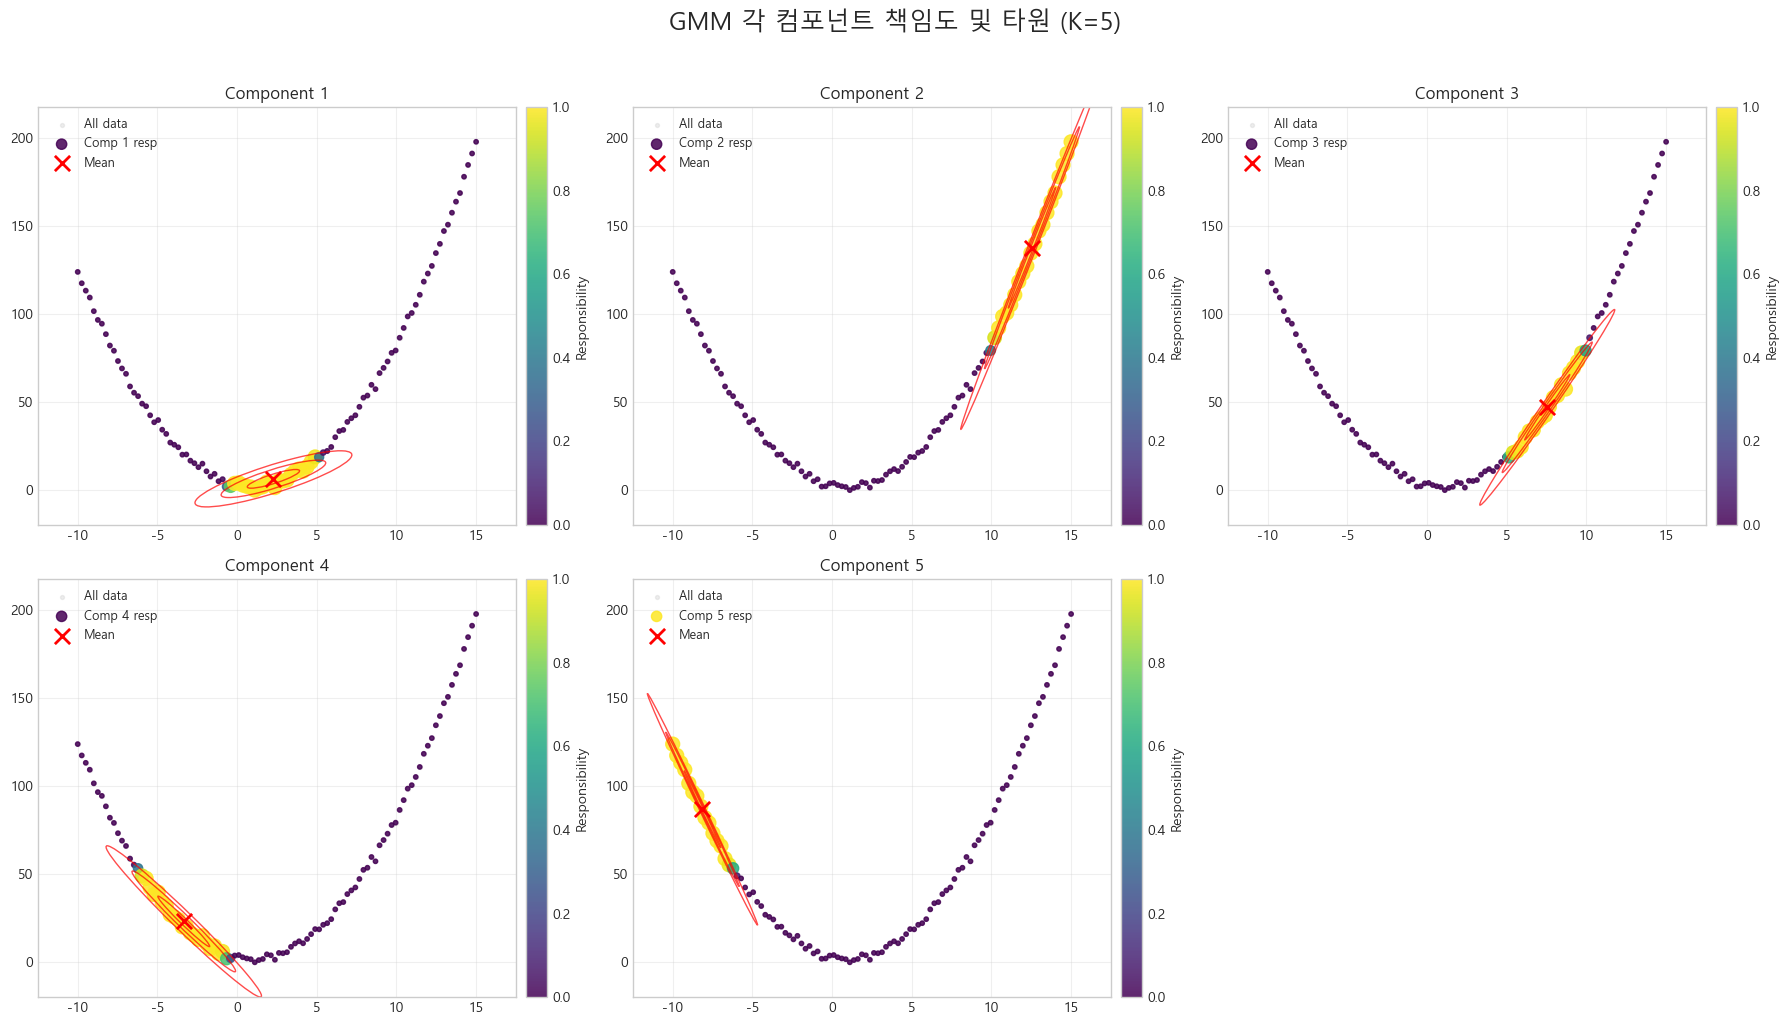

In [33]:
# 4. 컴포넌트별 개별 시각화
# 각 점이 컴포넌트 k에 속할 책임도(responsibility, gamma_{nk})를 활용하여
# - 전체 데이터는 연한 회색
# - 해당 컴포넌트는 책임도 값으로 색/크기 표현
# - 평균 + 1,2,3σ 타원

# (이전 셀의 draw_ellipse 함수가 이미 정의되어 있다고 가정)

responsibilities = best_gmm.predict_proba(data)  # shape: (n_samples, K)
K = best_n_components

# 서브플롯 배치 (가로 3개씩)
import math
cols = 3
rows = math.ceil(K / cols)
fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 5*rows))
axes = np.array(axes).reshape(-1)  # 1D 플랫

# 데이터 범위 (여백 포함)
margin = 0.1
xmin, xmax = data[:,0].min(), data[:,0].max()
ymin, ymax = data[:,1].min(), data[:,1].max()
xrng = xmax - xmin
yrng = ymax - ymin
xmin -= margin * xrng; xmax += margin * xrng
ymin -= margin * yrng; ymax += margin * yrng

# 개별 컴포넌트 시각화
for k in range(K):
    ax = axes[k]
    gamma_k = responsibilities[:, k]

    # 전체 점 (연한 회색)
    ax.scatter(data[:,0], data[:,1], s=8, color='lightgray', alpha=0.4, label='All data')

    # 해당 컴포넌트 강조: 책임도 기반 색상/크기
    sizes = 10 + 90 * gamma_k  # 10~100 범위
    sc = ax.scatter(
        data[:,0], data[:,1], c=gamma_k, s=sizes, cmap='viridis', alpha=0.85,
        edgecolors='face', label=f'Comp {k+1} resp'
    )

    # 컬러바 (개별 축마다)
    cbar = plt.colorbar(sc, ax=ax, fraction=0.045, pad=0.02)
    cbar.set_label('Responsibility')

    # 평균 & 타원
    draw_ellipse(best_gmm.means_[k], best_gmm.covariances_[k], ax=ax, color='red', alpha=0.7, linewidth=1)
    ax.scatter(best_gmm.means_[k][0], best_gmm.means_[k][1], c='red', marker='x', s=120, linewidth=2, label='Mean')

    ax.set_title(f'Component {k+1}')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.grid(alpha=0.3)
    ax.legend(loc='upper left', fontsize=9)

# 사용하지 않는 빈 축 제거
for j in range(K, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle(f'GMM 각 컴포넌트 책임도 및 타원 (K={K})', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

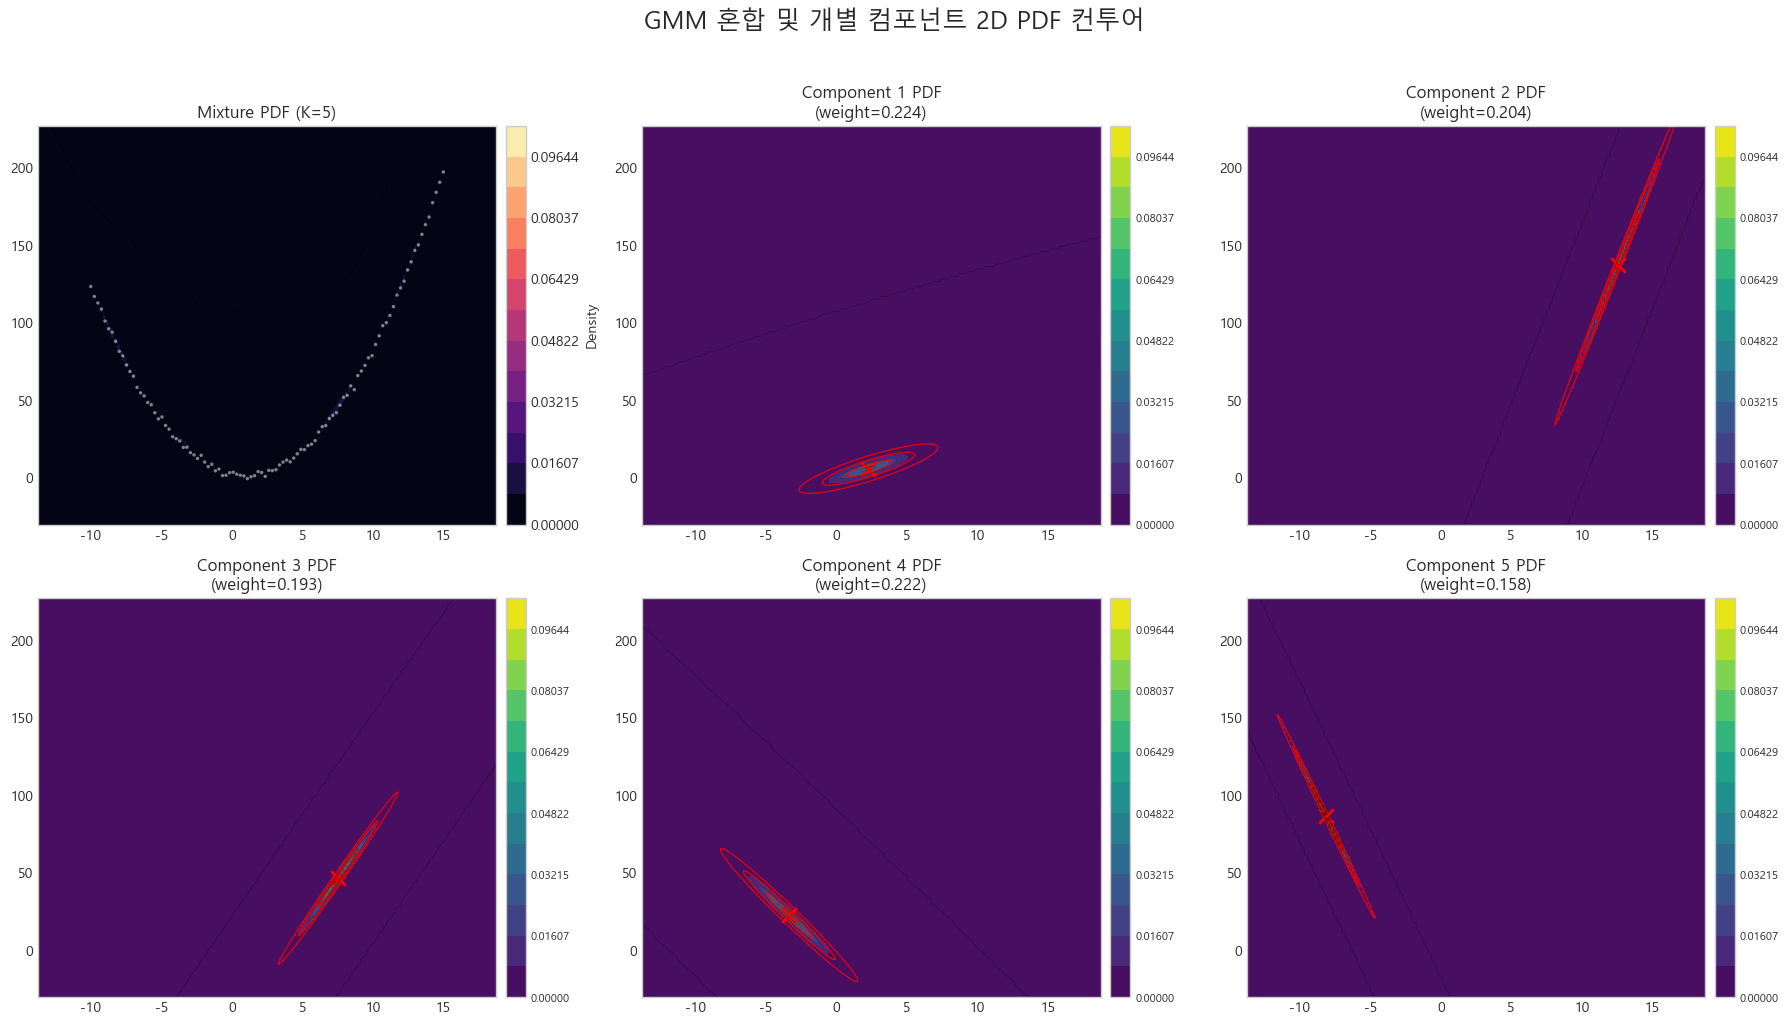

In [34]:
# 5. 각 가우시안 컴포넌트 & 전체 혼합 PDF 컨투어 시각화
# - 위 셀(4)에서는 책임도를 점에 매핑
# - 여기서는 연속적인 2D 공간에서 각 정규분포의 확률밀도함수(PDF)와
#   전체 혼합(mixture) PDF를 컨투어로 시각화

import numpy as np
import matplotlib.pyplot as plt

K = best_n_components
weights = best_gmm.weights_
means = best_gmm.means_
covariances = best_gmm.covariances_

# 2D Gaussian PDF 수동 구현 (scipy 미사용시 호환)
_TWO_PI = 2.0 * np.pi

def gaussian_pdf_grid(grid_points, mean, cov):
    d = mean.shape[0]
    cov_inv = np.linalg.inv(cov)
    det = np.linalg.det(cov)
    norm_const = np.sqrt((_TWO_PI)**d * det)
    diff = grid_points - mean  # (N, d)
    # Mahalanobis term
    expo = -0.5 * np.sum((diff @ cov_inv) * diff, axis=1)
    return np.exp(expo) / norm_const

# 그리드 범위 설정 (데이터 범위 + 여유)
margin = 0.15
xmin, xmax = data[:,0].min(), data[:,0].max()
ymin, ymax = data[:,1].min(), data[:,1].max()
xrng = xmax - xmin
yrng = ymax - ymin
xmin -= margin * xrng; xmax += margin * xrng
ymin -= margin * yrng; ymax += margin * yrng

# 해상도
n_grid = 160  # 해상도 (필요하면 100~300 사이 조정)
xlin = np.linspace(xmin, xmax, n_grid)
ylin = np.linspace(ymin, ymax, n_grid)
Xg, Yg = np.meshgrid(xlin, ylin)
grid_points = np.column_stack([Xg.ravel(), Yg.ravel()])  # (n_grid^2, 2)

# 각 컴포넌트 PDF 및 혼합 PDF 계산
component_pdfs = []
for k in range(K):
    pdf_k = gaussian_pdf_grid(grid_points, means[k], covariances[k]).reshape(n_grid, n_grid)
    component_pdfs.append(pdf_k)
component_pdfs = np.array(component_pdfs)  # (K, n_grid, n_grid)

mixture_pdf = np.tensordot(weights, component_pdfs, axes=(0,0))  # (n_grid, n_grid)

# 플롯 레이아웃 (첫 번째: 전체 mixture + 데이터, 이후 각 컴포넌트)
import math
cols = 3
rows = math.ceil((K + 1) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 5*rows))
axes = np.array(axes).reshape(-1)

# 공통 컬러레벨 (각 컴포넌트 최대보다 조금 크게)
max_val = max(mixture_pdf.max(), component_pdfs.max())
levels = np.linspace(0, max_val, 14)

# 5-1. 전체 혼합 PDF
ax0 = axes[0]
cf = ax0.contourf(Xg, Yg, mixture_pdf, levels=levels, cmap='magma')
ax0.contour(Xg, Yg, mixture_pdf, levels=levels[::2], colors='k', alpha=0.4, linewidths=0.6)
ax0.scatter(data[:,0], data[:,1], s=6, c='white', alpha=0.5, edgecolors='none')
ax0.set_title(f'Mixture PDF (K={K})')
ax0.set_xlim(xmin, xmax); ax0.set_ylim(ymin, ymax)
ax0.grid(alpha=0.2)
cb0 = plt.colorbar(cf, ax=ax0, fraction=0.045, pad=0.02)
cb0.set_label('Density')

# 5-2. 각 컴포넌트 PDF
for k in range(K):
    ax = axes[k+1]
    pdf_k = component_pdfs[k]
    cfk = ax.contourf(Xg, Yg, pdf_k, levels=levels, cmap='viridis')
    ax.contour(Xg, Yg, pdf_k, levels=levels[::2], colors='k', alpha=0.35, linewidths=0.5)
    # 평균 및 타원 (draw_ellipse 재사용)
    draw_ellipse(means[k], covariances[k], ax=ax, color='red', alpha=0.8, linewidth=1)
    ax.scatter(means[k][0], means[k][1], c='red', marker='x', s=110, linewidths=2)
    ax.set_title(f'Component {k+1} PDF\n(weight={weights[k]:.3f})')
    ax.set_xlim(xmin, xmax); ax.set_ylim(ymin, ymax)
    ax.grid(alpha=0.2)
    cb = plt.colorbar(cfk, ax=ax, fraction=0.045, pad=0.02)
    cb.ax.tick_params(labelsize=8)

# 남는 축 제거
for j in range(K+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('GMM 혼합 및 개별 컴포넌트 2D PDF 컨투어', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

In [35]:
# 6. GMM 각 컴포넌트의 평균, 분산(공분산) 요약
import numpy as np
import pandas as pd

K = best_gmm.n_components
means = best_gmm.means_              # (K, 2)
covariances = best_gmm.covariances_   # (K, 2, 2)  (covariance_type='full' 가정)
weights = best_gmm.weights_           # (K,)

rows = []
for k in range(K):
    mu = means[k]
    cov = covariances[k]
    var_x, var_y = np.diag(cov)
    corr = cov[0,1] / np.sqrt(var_x * var_y)
    rows.append({
        'Component': k+1,
        'Weight (pi_k)': weights[k],
        'Mean_x': mu[0],
        'Mean_y': mu[1],
        'Var_x': var_x,
        'Var_y': var_y,
        'Cov_xy': cov[0,1],
        'Corr_xy': corr,
        'Det|Σ|': np.linalg.det(cov)
    })

summary_df = pd.DataFrame(rows)
summary_df_sorted = summary_df.sort_values('Weight (pi_k)', ascending=False).reset_index(drop=True)

print(f"covariance_type = {getattr(best_gmm, 'covariance_type', 'unknown')}")
print("\n[정렬: Weight 내림차순]")
display(summary_df_sorted.round(5))

print("\n각 컴포넌트 상세 공분산 행렬:")
for k in range(K):
    print(f"\n--- Component {k+1} (weight={weights[k]:.4f}) ---")
    print(covariances[k])

covariance_type = full

[정렬: Weight 내림차순]


,Component,Weight (pi_k),Mean_x,Mean_y,Var_x,Var_y,Cov_xy,Corr_xy,Det|Σ|
0,1,0.22394,2.28207,6.19529,2.69331,28.21918,7.43022,0.85229,20.79481
1,4,0.22179,-3.34386,23.03301,2.64300,204.95849,-22.91383,-0.98450,16.66087
2,2,0.20403,12.54746,137.46783,2.22070,1181.93403,51.13167,0.99804,10.27837
3,3,0.19259,7.54238,46.82778,1.99280,342.82463,26.00010,0.99473,7.17529
4,5,0.15765,-8.13212,86.69838,1.32960,480.78067,-25.23982,-0.99828,2.19979



각 컴포넌트 상세 공분산 행렬:

--- Component 1 (weight=0.2239) ---
[[ 2.6933083   7.4302172 ]
 [ 7.4302172  28.21917648]]

--- Component 2 (weight=0.2040) ---
[[   2.22070473   51.13167439]
 [  51.13167439 1181.93403194]]

--- Component 3 (weight=0.1926) ---
[[  1.99279796  26.00009502]
 [ 26.00009502 342.82463318]]

--- Component 4 (weight=0.2218) ---
[[  2.64299523 -22.91382649]
 [-22.91382649 204.95848934]]

--- Component 5 (weight=0.1576) ---
[[  1.32960483 -25.23982012]
 [-25.23982012 480.7806724 ]]


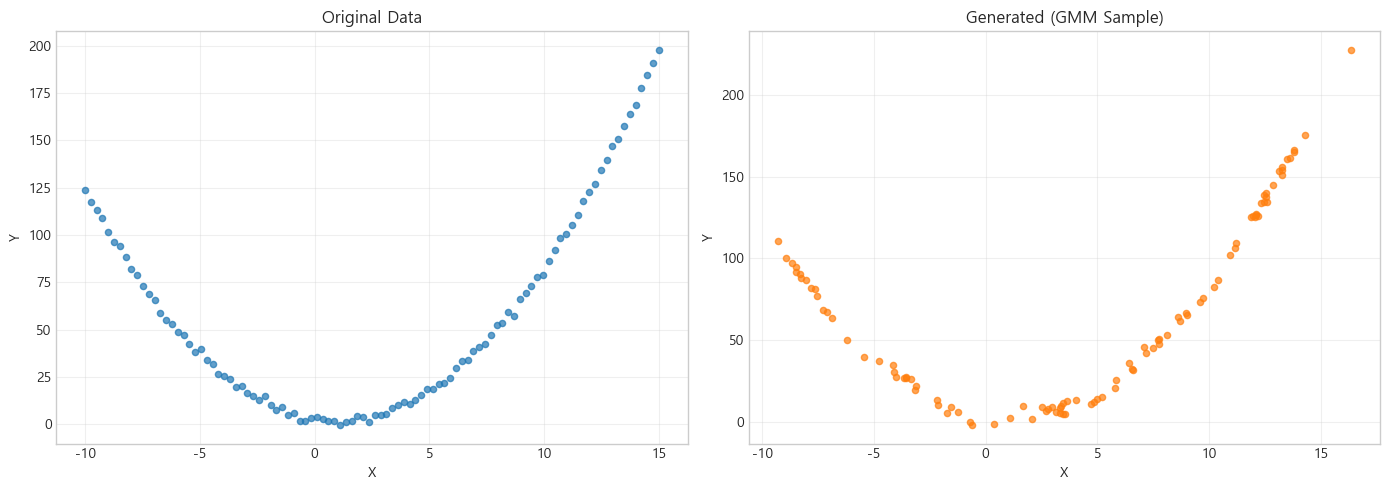

[기초 통계 비교]
Original mean: [ 2.5        57.22975211]
Generated mean: [ 3.86550794 65.40445536]
Mean L2 diff: 8.2880

Original cov:
 [[  53.67224433  161.46092236]
 [ 161.46092236 2776.43386703]]
Generated cov:
 [[  55.2289916   210.63752777]
 [ 210.63752777 3018.25099907]]
Cov Frobenius diff: 251.6240
Fréchet distance (Gaussian approx): 156.4852

[로그우도 비교]
Mean log-likelihood (original data):  -5.5360
Mean log-likelihood (generated data): -5.3748
Log-likelihood gap (orig - gen): -0.1613

[2D 히스토그램 분포 차이]
L1 distance: 0.9307
L2 distance: 0.1429
Jensen-Shannon divergence (approx): 0.242831

[KS 검정 - Marginals]
X KS stat=0.1300, p=0.3682
Y KS stat=0.1100, p=0.5830

해석 가이드:
- mean/cov 차이가 작고 Frechet distance가 낮을수록 전반적 2차 모멘트 유사
- 로그우도 평균이 유사하면 모델이 생성한 샘플이 학습 데이터와 비슷한 밀도 영역
- L1/L2/JS 값이 0에 가까울수록 2D 분포 유사
- KS p-value가 높으면 (유의수준보다 크면) 해당 축 분포 차이가 통계적으로 유의하지 않다고 볼 수 있음


In [36]:
# 7. 추정된 GMM으로부터 새로운 데이터 샘플링 & 원본 데이터와 유사도 평가
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

n_gen = data.shape[0]  # 원본과 동일한 개수 샘플
sampled_data, sampled_labels = best_gmm.sample(n_gen)   # (n_gen, 2)

# 1) 기초 통계 비교
orig_mean = data.mean(axis=0)
orig_cov = np.cov(data, rowvar=False)

gen_mean = sampled_data.mean(axis=0)
gen_cov = np.cov(sampled_data, rowvar=False)

mean_diff = np.linalg.norm(orig_mean - gen_mean)
cov_diff_fro = np.linalg.norm(orig_cov - gen_cov, ord='fro')

# 2) Fréchet Distance (두 2D 가우시안 근사) - sqrtm 구현 (2x2 고유분해)
def sqrtm_2x2(mat):
    vals, vecs = np.linalg.eigh(mat)
    vals_clipped = np.clip(vals, 0, None)
    return (vecs * np.sqrt(vals_clipped)) @ vecs.T

sqrt_term = sqrtm_2x2(orig_cov @ gen_cov)
frechet_dist = np.sum((orig_mean - gen_mean)**2) + np.trace(orig_cov + gen_cov - 2*sqrt_term)

# 3) 로그우도 비교 (모델 적합성 관점)
ll_orig = best_gmm.score_samples(data)
ll_gen  = best_gmm.score_samples(sampled_data)
ll_orig_mean, ll_gen_mean = ll_orig.mean(), ll_gen.mean()
ll_gap = ll_orig_mean - ll_gen_mean

# 4) 2D 히스토그램 기반 분포 차이 (L1/L2, JSD 근사)
bins = 30
(xedges, yedges) = (np.linspace(data[:,0].min(), data[:,0].max(), bins+1),
                    np.linspace(data[:,1].min(), data[:,1].max(), bins+1))
H_orig, _, _ = np.histogram2d(data[:,0], data[:,1], bins=[xedges, yedges], density=True)
H_gen,  _, _ = np.histogram2d(sampled_data[:,0], sampled_data[:,1], bins=[xedges, yedges], density=True)

# 작은 epsilon 추가 (안정성)
eps = 1e-12
P = H_orig + eps
Q = H_gen + eps
P /= P.sum(); Q /= Q.sum()

l1_dist = np.abs(P - Q).sum()
l2_dist = np.sqrt(((P - Q)**2).sum())
M = 0.5*(P+Q)
jsd = 0.5*( (P*np.log(P/M)).sum() + (Q*np.log(Q/M)).sum() )

# 5) (선택) KS검정: marginals (가능시 SciPy)
try:
    from scipy.stats import ks_2samp
    ks_x = ks_2samp(data[:,0], sampled_data[:,0])
    ks_y = ks_2samp(data[:,1], sampled_data[:,1])
except Exception:
    ks_x = ks_y = None

# 시각화: 원본 vs 생성
fig, axes = plt.subplots(1, 2, figsize=(14,5))
axes[0].scatter(data[:,0], data[:,1], s=20, alpha=0.7, label='Original', c='tab:blue')
axes[0].set_title('Original Data')
axes[0].grid(alpha=0.3)
axes[1].scatter(sampled_data[:,0], sampled_data[:,1], s=20, alpha=0.7, label='Generated', c='tab:orange')
axes[1].set_title('Generated (GMM Sample)')
axes[1].grid(alpha=0.3)
for ax in axes:
    ax.set_xlabel('X'); ax.set_ylabel('Y')
plt.tight_layout()
plt.show()

# 결과 요약 출력
print('[기초 통계 비교]')
print('Original mean:', orig_mean)
print('Generated mean:', gen_mean)
print(f'Mean L2 diff: {mean_diff:.4f}')
print('\nOriginal cov:\n', orig_cov)
print('Generated cov:\n', gen_cov)
print(f'Cov Frobenius diff: {cov_diff_fro:.4f}')
print(f'Fréchet distance (Gaussian approx): {frechet_dist:.4f}')

print('\n[로그우도 비교]')
print(f'Mean log-likelihood (original data):  {ll_orig_mean:.4f}')
print(f'Mean log-likelihood (generated data): {ll_gen_mean:.4f}')
print(f'Log-likelihood gap (orig - gen): {ll_gap:.4f}')

print('\n[2D 히스토그램 분포 차이]')
print(f'L1 distance: {l1_dist:.4f}')
print(f'L2 distance: {l2_dist:.4f}')
print(f'Jensen-Shannon divergence (approx): {jsd:.6f}')

if ks_x is not None:
    print('\n[KS 검정 - Marginals]')
    print(f'X KS stat={ks_x.statistic:.4f}, p={ks_x.pvalue:.4f}')
    print(f'Y KS stat={ks_y.statistic:.4f}, p={ks_y.pvalue:.4f}')
else:
    print('\n[KS 검정] SciPy 미설치 또는 오류로 건너뜀')

# 간단한 해석 힌트
print('\n해석 가이드:')
print('- mean/cov 차이가 작고 Frechet distance가 낮을수록 전반적 2차 모멘트 유사')
print('- 로그우도 평균이 유사하면 모델이 생성한 샘플이 학습 데이터와 비슷한 밀도 영역')
print('- L1/L2/JS 값이 0에 가까울수록 2D 분포 유사')
print('- KS p-value가 높으면 (유의수준보다 크면) 해당 축 분포 차이가 통계적으로 유의하지 않다고 볼 수 있음')

[EM] 19회에서 수렴 (loglik diff < tol)
총 기록 iteration 수: 19


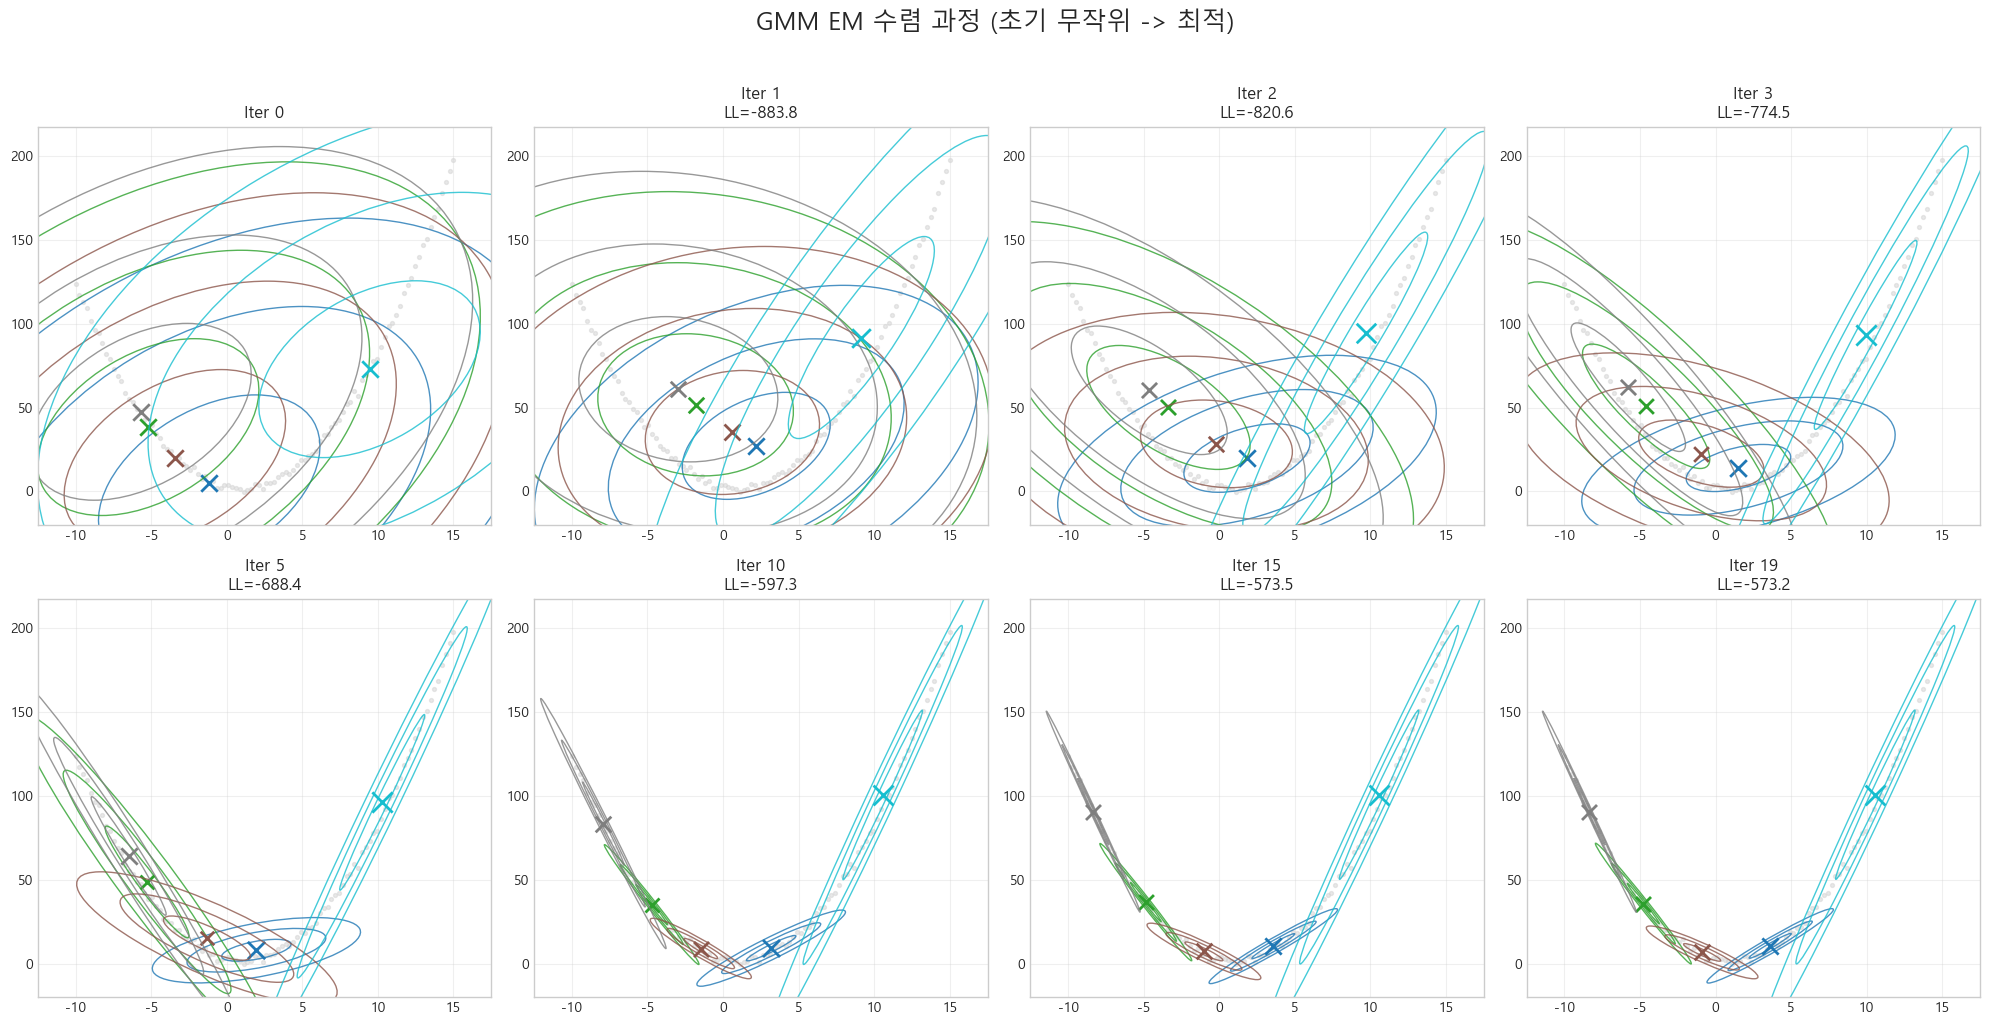

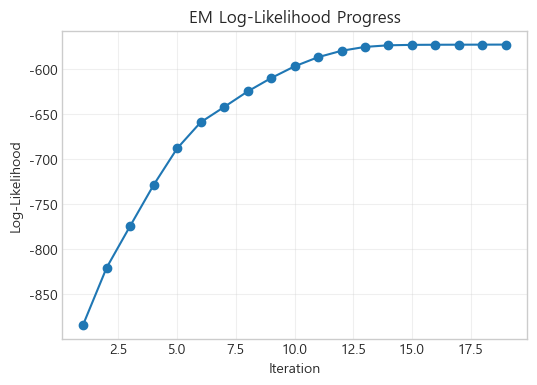

표시된 iteration: [0, 1, 2, 3, 5, 10, 15, 19]
최종 log-likelihood: -573.1797274972521


In [37]:
# 8. 수동 EM 구현으로 초기 무작위 -> 최적 수렴 과정 시각화
import numpy as np
import matplotlib.pyplot as plt

# 동일 데이터 사용: data (N,2), best_n_components (K)
K = best_n_components
X = data
N, D = X.shape

np.random.seed(2024)

# 초기화: 평균은 데이터에서 무작위 선택, 공분산은 전체 공분산 + 작은 잡음, 가중치는 균등
init_indices = np.random.choice(N, K, replace=False)
means_em = X[init_indices].copy()              # (K,D)
overall_cov = np.cov(X, rowvar=False)
reg_c = 1e-3
covs_em = np.array([overall_cov + reg_c * np.eye(D) for _ in range(K)])  # (K,D,D)
weights_em = np.full(K, 1.0 / K)

# 기록용 히스토리 (iteration 0은 초기)
means_hist = [means_em.copy()]
covs_hist = [covs_em.copy()]
weights_hist = [weights_em.copy()]
loglik_hist = []

max_iter = 40
tol = 1e-4

# Gaussian logpdf 계산 함수
def gaussian_logpdf(X, mean, cov):
    # X (N,D)
    diff = X - mean  # (N,D)
    cov_inv = np.linalg.inv(cov)
    log_det = np.log(np.linalg.det(cov) + 1e-15)
    expo = -0.5 * np.sum((diff @ cov_inv) * diff, axis=1)  # (N,)
    return expo - 0.5 * (D * np.log(2 * np.pi) + log_det)

for it in range(1, max_iter + 1):
    # E-step: log 책임도
    log_prob = np.zeros((N, K))
    for k in range(K):
        log_prob[:, k] = np.log(weights_em[k] + 1e-15) + gaussian_logpdf(X, means_em[k], covs_em[k])
    # log-sum-exp
    max_lp = log_prob.max(axis=1, keepdims=True)
    log_sum = max_lp + np.log(np.sum(np.exp(log_prob - max_lp), axis=1, keepdims=True))
    log_resp = log_prob - log_sum
    resp = np.exp(log_resp)  # (N,K)

    # 로그우도
    ll = np.sum(log_sum)
    loglik_hist.append(ll)

    # M-step
    Nk = resp.sum(axis=0) + 1e-15  # (K,)
    weights_em = Nk / N
    means_em = (resp.T @ X) / Nk[:, None]
    for k in range(K):
        diff = X - means_em[k]
        cov_k = (resp[:, k][:, None] * diff).T @ diff / Nk[k]
        # 정규화 + 안정성
        covs_em[k] = cov_k + reg_c * np.eye(D)

    # 기록
    means_hist.append(means_em.copy())
    covs_hist.append(covs_em.copy())
    weights_hist.append(weights_em.copy())

    # 수렴 체크
    if it > 1 and abs(loglik_hist[-1] - loglik_hist[-2]) < tol * (abs(loglik_hist[-2]) + 1e-12):
        print(f"[EM] {it}회에서 수렴 (loglik diff < tol)")
        break
else:
    print("[EM] max_iter 도달")

final_iter = len(means_hist) - 1
print(f"총 기록 iteration 수: {final_iter}")

# 시각화에 사용할 iteration 선택
candidate_iters = [0, 1, 2, 3, 5, 10, 15, final_iter]
show_iters = [i for i in candidate_iters if i <= final_iter]

# 색상 팔레트
colors = plt.cm.tab10(np.linspace(0, 1, K))

# draw_ellipse 함수가 전역에 없다면 다시 정의
if 'draw_ellipse' not in globals():
    from matplotlib.patches import Ellipse
    def draw_ellipse(position, covariance, ax=None, **kwargs):
        ax = ax or plt.gca()
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
        for nsig in range(1, 4):
            ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle=angle, fill=False, **kwargs))

# 레이아웃
cols = 4
rows = int(np.ceil(len(show_iters) / cols))
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
axes = np.array(axes).reshape(-1)

xmin, xmax = X[:,0].min(), X[:,0].max()
ymin, ymax = X[:,1].min(), X[:,1].max()
mx = 0.1
xpad = (xmax - xmin) * mx
ypp = (ymax - ymin) * mx
x_range = (xmin - xpad, xmax + xpad)
y_range = (ymin - ypp, ymax + ypp)

for ax, it in zip(axes, show_iters):
    ax.scatter(X[:,0], X[:,1], s=8, color='lightgray', alpha=0.5)
    m_it = means_hist[it]
    c_it = covs_hist[it]
    w_it = weights_hist[it]
    for k in range(K):
        draw_ellipse(m_it[k], c_it[k], ax=ax, color=colors[k], alpha=0.8, linewidth=1)
        ax.scatter(m_it[k,0], m_it[k,1], c=[colors[k]], s=60 + 400*w_it[k], marker='x', linewidths=2)
    title = f"Iter {it}"
    if it > 0 and it <= len(loglik_hist):
        title += f"\nLL={loglik_hist[it-1]:.1f}"
    ax.set_title(title)
    ax.set_xlim(*x_range); ax.set_ylim(*y_range)
    ax.grid(alpha=0.3)

# 남는 축 제거
for j in range(len(show_iters), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('GMM EM 수렴 과정 (초기 무작위 -> 최적)', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

# 로그우도 곡선
plt.figure(figsize=(6,4))
plt.plot(range(1, len(loglik_hist)+1), loglik_hist, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.title('EM Log-Likelihood Progress')
plt.grid(alpha=0.3)
plt.show()

print('표시된 iteration:', show_iters)
print('최종 log-likelihood:', loglik_hist[-1])